In [1]:
import pandas as pd

# Reading in superCOVID-19 dataset

In [2]:
#read super data
superdata = pd.read_csv("..\data\superCOVID-19datafame.csv")
#fill zeroes to make countyFIPS five digits
superdata['countyFIPS'] = superdata.countyFIPS.astype('str')
superdata['countyFIPS'] = superdata['countyFIPS'].apply(lambda x: x.zfill(5))
#display dataframes
superdata.head(5)

,countyFIPS,County Name,State,population,stateFIPS,confirmed_1/22/20,confirmed_1/23/20,confirmed_1/24/20,confirmed_1/25/20,confirmed_1/26/20,...,deaths_9/10/20,deaths_9/11/20,deaths_9/12/20,deaths_9/13/20,deaths_9/14/20,deaths_9/15/20,deaths_9/16/20,deaths_9/17/20,deaths_9/18/20,deaths_9/19/20
0,00000,Statewide Unallocated,AL,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01001,Autauga County,AL,55869,1,0,0,0,0,0,...,24,24,24,24,24,24,24,24,24,24
2,01003,Baldwin County,AL,223234,1,0,0,0,0,0,...,46,47,47,47,47,47,47,48,48,49
3,01005,Barbour County,AL,24686,1,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
4,01007,Bibb County,AL,22394,1,0,0,0,0,0,...,9,9,9,9,9,9,9,9,10,10


# Show Data for Washington State 

In [3]:
WA = superdata[superdata['State'] == "WA"]
WA.head()

,countyFIPS,County Name,State,population,stateFIPS,confirmed_1/22/20,confirmed_1/23/20,confirmed_1/24/20,confirmed_1/25/20,confirmed_1/26/20,...,deaths_9/10/20,deaths_9/11/20,deaths_9/12/20,deaths_9/13/20,deaths_9/14/20,deaths_9/15/20,deaths_9/16/20,deaths_9/17/20,deaths_9/18/20,deaths_9/19/20
2985,00000,Statewide Unallocated,WA,0,53,0,0,0,0,0,...,4,4,4,4,4,4,4,4,5,5
2986,53001,Adams County,WA,19983,53,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
2987,53003,Asotin County,WA,22582,53,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
2988,53005,Benton County,WA,204390,53,0,0,0,0,0,...,126,126,126,126,126,126,126,127,127,127
2989,53007,Chelan County,WA,77200,53,0,0,0,0,0,...,13,13,13,13,13,14,14,14,14,14


# Trends Over Past Week - Washington

In [4]:
#Collecting the necessary columns
week_confirmed = ["confirmed_9/12/20", "confirmed_9/13/20", "confirmed_9/14/20", "confirmed_9/15/20", "confirmed_9/16/20", "confirmed_9/17/20", "confirmed_9/18/20", "confirmed_9/19/20"]
week_deaths = ["deaths_9/12/20", "deaths_9/13/20", "deaths_9/14/20", "deaths_9/15/20", "deaths_9/16/20", "deaths_9/17/20", "deaths_9/18/20", "deaths_9/19/20"]
WA_confirmed = WA[week_confirmed]
WA_deaths = WA[week_deaths]

## Aggregating the sum of the confirmed cases for each day

In [5]:
#Summing the values for confirmed cases for each date.
WA_sum_confirmed = WA_confirmed.agg(sum)
print(WA_sum_confirmed)


confirmed_9/12/20    79476
confirmed_9/13/20    79825
confirmed_9/14/20    80138
confirmed_9/15/20    80464
confirmed_9/16/20    80810
confirmed_9/17/20    81185
confirmed_9/18/20    81601
confirmed_9/19/20    82199
dtype: int64


## Finding the difference between the daily sums. 

In [6]:
#Getting the difference from day to day
WA_diff_confirmed = WA_sum_confirmed.diff()
WA_diff_confirmed.rename({"confirmed_9/12/20":"9/12/20", "confirmed_9/13/20":"9/13/20", "confirmed_9/14/20":"9/14/20", "confirmed_9/15/20":"9/15/20", "confirmed_9/16/20": "9/16/20", "confirmed_9/17/20": "9/17/20", "confirmed_9/18/20":"9/18/20", "confirmed_9/19/20": "9/19/20"}, axis=0, inplace=True)

print(WA_diff_confirmed)


9/12/20      NaN
9/13/20    349.0
9/14/20    313.0
9/15/20    326.0
9/16/20    346.0
9/17/20    375.0
9/18/20    416.0
9/19/20    598.0
dtype: float64


## Aggregating the sum of deaths for each day

In [7]:
#Summing the values for deaths for each date
WA_sum_deaths = WA_deaths.agg(sum)
print(WA_sum_deaths)


deaths_9/12/20    1991
deaths_9/13/20    1991
deaths_9/14/20    2006
deaths_9/15/20    2015
deaths_9/16/20    2020
deaths_9/17/20    2029
deaths_9/18/20    2036
deaths_9/19/20    2036
dtype: int64


## Finding the difference between the daily sums. 

In [8]:
#Getting the difference from day to day
WA_diff_deaths = WA_sum_deaths.diff()
WA_diff_deaths.rename({"deaths_9/12/20":"9/12/20", "deaths_9/13/20": "9/13/20", "deaths_9/14/20":"9/14/20", "deaths_9/15/20": "9/15/20", "deaths_9/16/20":"9/16/20", "deaths_9/17/20":"9/17/20", "deaths_9/18/20":"9/18/20", "deaths_9/19/20":"9/19/20"}, axis=0, inplace=True)
print(WA_diff_deaths)

9/12/20     NaN
9/13/20     0.0
9/14/20    15.0
9/15/20     9.0
9/16/20     5.0
9/17/20     9.0
9/18/20     7.0
9/19/20     0.0
dtype: float64


## Creating a visual representation of the change in confirmed cases and deaths for the week

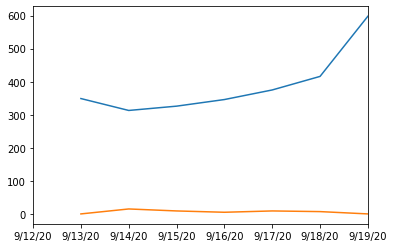

In [16]:
#Plotting the difference
WA_diff_confirmed.plot()
WA_diff_deaths.plot()

### The data shows that the confirmed cases dipped between 9/13 and 9/14, but then began increasing to a  significant spike between 9/18 and 9/19. At the same time as the dip in the confirmed cases, the deaths bumped up a bit then leveled off. 

# Reading in Housing Characteristics datasets

In [18]:
# read dataset
housingdata = pd.read_csv("..\data\HousingCharacteristics.csv", header=1)

#change id to countyFIPS and set countyFIPS to 5 digits
housingdata.rename({'id':'countyFIPS'}, axis=1, inplace=True)
housingdata['countyFIPS'] = housingdata['countyFIPS'].str[-5:]

#rename column headings to match superdata
housingdata.rename({'Geographic Area Name':'County Name', 'Estimate!!HOUSING OCCUPANCY!!Total housing units': 'Total Housing Units', 'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units': 'Occupied housing units', 'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units': 'Vacant housing units', 'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Homeowner vacancy rate': 'Homeowner vacancy rate', 'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Rental vacancy rate': 'Rental vacancy rate', 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!1-unit, detached': '1-unit, detached', 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!1-unit, attached': '1-unit, attached', 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!5 to 9 units': '5 to 9 units', 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!20 or more units': '20 or more units', 'Estimate!!UNITS IN STRUCTURE!!Total housing units!!Mobile home': 'Mobile homes', 'Estimate!!ROOMS!!Total housing units!!1 room': '1 room', 'Estimate!!ROOMS!!Total housing units!!4 rooms': '4 rooms', 'Estimate!!ROOMS!!Total housing units!!9 rooms or more': '9 rooms or more', 'Estimate!!HOUSING TENURE!!Occupied housing units!!Average household size of owner-occupied unit': 'Average household size -- Owner-occupied', 'Estimate!!HOUSING TENURE!!Occupied housing units!!Average household size of renter-occupied unit': 'Average household size -- Renter-occupied', 'Estimate!!VALUE!!Owner-occupied units!!Median (dollars)':'Owner-occupied value value: Median (dollars)', 'Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!Median (dollars)': 'Housing unit with mortgage: Median (dollars)', 'Estimate!!GROSS RENT!!Occupied units paying rent!!Median (dollars)': 'Housing unit paying rent: Median (dollars)'}, axis=1, inplace=True)
housingdata.columns.values[2] = 'State'

#remove unused columns
housingdata = housingdata[['countyFIPS', 'County Name', 'State', 'Total Housing Units', 'Occupied housing units', 'Occupied housing units', 'Vacant housing units','Homeowner vacancy rate','Rental vacancy rate','1-unit, detached','1-unit, attached', '5 to 9 units','20 or more units', 'Mobile homes','1 room', '4 rooms','9 rooms or more','Average household size -- Owner-occupied', 'Average household size -- Renter-occupied','Owner-occupied value value: Median (dollars)','Housing unit with mortgage: Median (dollars)','Housing unit paying rent: Median (dollars)']]

#display housingdata
housingdata.head()

,countyFIPS,County Name,State,Total Housing Units,Occupied housing units,Occupied housing units,Vacant housing units,Homeowner vacancy rate,Rental vacancy rate,"1-unit, detached",...,20 or more units,Mobile homes,1 room,4 rooms,9 rooms or more,Average household size -- Owner-occupied,Average household size -- Renter-occupied,Owner-occupied value value: Median (dollars),Housing unit with mortgage: Median (dollars),Housing unit paying rent: Median (dollars)
0,01001,Autauga County,Alabama,23315,21115,21115,2200,1.1,5.9,16865,...,569,4279,130,2366,2613,2.59,2.60,147900,1176,966
1,01003,Baldwin County,Alabama,111945,78622,78622,33323,4.1,42.2,70081,...,16621,13075,1231,19510,10052,2.66,2.48,189800,1359,958
2,01005,Barbour County,Alabama,11937,9186,9186,2751,3.4,8.0,6708,...,56,3484,115,2014,1010,2.44,2.58,92900,950,590
3,01007,Bibb County,Alabama,9161,6840,6840,2321,1.6,3.3,5940,...,149,2615,34,921,802,3.05,2.81,96500,1093,714
4,01009,Blount County,Alabama,24222,20600,20600,3622,1.1,8.4,16688,...,98,6108,151,4033,2501,2.85,2.48,124700,1100,662


# Merge superdata and housing data

In [10]:
merged = pd.merge(superdata, housingdata, left_index=True, right_index=True)

total_current_columns = len(merged.columns)

merged.head()

,countyFIPS_x,County Name_x,State_x,population,stateFIPS,confirmed_1/22/20,confirmed_1/23/20,confirmed_1/24/20,confirmed_1/25/20,confirmed_1/26/20,...,20 or more units,Mobile homes,1 room,4 rooms,9 rooms or more,Average household size -- Owner-occupied,Average household size -- Renter-occupied,Owner-occupied value value: Median (dollars),Housing unit with mortgage: Median (dollars),Housing unit paying rent: Median (dollars)
0,00000,Statewide Unallocated,AL,0,1,0,0,0,0,0,...,569,4279,130,2366,2613,2.59,2.60,147900,1176,966
1,01001,Autauga County,AL,55869,1,0,0,0,0,0,...,16621,13075,1231,19510,10052,2.66,2.48,189800,1359,958
2,01003,Baldwin County,AL,223234,1,0,0,0,0,0,...,56,3484,115,2014,1010,2.44,2.58,92900,950,590
3,01005,Barbour County,AL,24686,1,0,0,0,0,0,...,149,2615,34,921,802,3.05,2.81,96500,1093,714
4,01007,Bibb County,AL,22394,1,0,0,0,0,0,...,98,6108,151,4033,2501,2.85,2.48,124700,1100,662


# Save merged data to csv file

In [11]:
merged.to_csv("..\data\superCOVID-housingdataframe.csv")